### Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading clinic data and household data
clinic_data_path = r"C:\Users\E5550 GRAPHICS\Downloads\clinic - clinic.csv"
household_data_path = r"C:\Users\E5550 GRAPHICS\Downloads\household.csv"

clinic_data = pd.read_csv(clinic_data_path)
household_data = pd.read_csv(household_data_path)

### Initial Data Exploration
Check the basic structure of the datasets:

In [2]:
# View first few rows
clinic_data.head()

,Unnamed: 0,pid,enrollment_date,site,ttype,uuid,md_submissiondate,md_submitterid,sex,cg_sex,cg_age,enrollment_age,enrollment_weight,discharge_weight,discharge_date,discharge_age,staffmember
0,1,24-3276,8/14/2024,galdamari,RUTF,aa1fe737-2f41-432c-ae37-7ac456f2b0d3,07:08.5,168,male,female,19,24,6.80,9.00,10/23/2024,26,staff2
1,2,24-3273,8/14/2024,galdamari,RUTF,5b2e5644-d69b-4a7f-afec-03e32e1500b8,07:07.4,168,female,female,16,9,5.20,7.00,10/23/2024,11,staff2
2,3,24-3191,8/29/2024,kwami,RUTF,4242627b-5a04-46ff-8e54-80ab5f3e5754,28:40.9,170,male,female,33,17,7.05,8.00,10/24/2024,18,staff7
3,4,24-3173,8/23/2024,kwami,RUTF,518a0740-5cc4-4070-95a6-caa78d9dfe95,45:20.7,170,male,female,25,22,7.65,9.20,10/24/2024,24,staff7
4,5,24-3635,9/19/2024,birin_fulani,RUTF,f5665a1e-4281-4b55-8c58-b147a1695411,55:15.1,169,female,female,46,19,5.25,7.45,10/24/2024,20,staff5


In [3]:
household_data.head()

,SubmissionDate,start_time,end_time,deviceid,validdates,todate,site,pid,age,est_age,...,instanceName,KEY,SubmitterID,AttachmentsPresent,AttachmentsExpected,Status,ReviewState,DeviceID,Edits,FormVersion
0,2025-02-10T10:41:59.808Z,2025-02-10T10:29:36.327+01:00,2025-02-10T11:41:02.842+01:00,collect:fYb2PpTPaJVL5FqB,2025-02-09 2025-02-10 2025-02-11 2025-02-12,2/10/2025,bani_gaye,24-4465,19.0,18.60,...,"Relapse Study: 24-4465, m0",uuid:736a6123-8487-4004-b437-bc5efa18968b,261,2,2,NaN,NaN,collect:fYb2PpTPaJVL5FqB,0,2025-02-10T03:06:14.091318
1,2025-02-07T18:22:40.001Z,2025-02-07T13:10:30.955+01:00,2025-02-07T19:20:50.753+01:00,collect:gArYDbh9KeOhS4LP,2025-02-06 2025-02-07 2025-02-08 2025-02-09,2/7/2025,birin_fulani,24-2245,23.0,23.00,...,"Relapse Study: 24-2245, m0",uuid:40dc6e53-7fc3-43df-947c-c409fe9ec3d7,260,2,2,NaN,NaN,collect:gArYDbh9KeOhS4LP,0,2025-02-07T10:00:25.765561
2,2025-02-07T18:22:27.945Z,2025-02-07T12:21:57.725+01:00,2025-02-07T19:20:28.784+01:00,collect:gArYDbh9KeOhS4LP,2025-02-06 2025-02-07 2025-02-08 2025-02-09,2/7/2025,birin_fulani,24-1358,22.0,22.80,...,"Relapse Study: 24-1358, m0",uuid:fe09ac26-b971-4d2a-9f73-71c9755f76e2,260,2,2,NaN,NaN,collect:gArYDbh9KeOhS4LP,0,2025-02-07T10:00:25.765561
3,2025-02-07T18:21:01.498Z,2025-02-07T10:37:46.441+01:00,2025-02-07T19:19:35.986+01:00,collect:gArYDbh9KeOhS4LP,2025-02-06 2025-02-07 2025-02-08 2025-02-09,2/7/2025,birin_fulani,24-1124,18.0,17.97,...,"Relapse Study: 24-1124, m0",uuid:bfbb7ce9-4da9-4f4c-b80b-2bb75c66042b,260,2,2,NaN,NaN,collect:gArYDbh9KeOhS4LP,0,2025-02-07T10:00:25.765561
4,2025-02-07T15:42:28.089Z,2025-02-07T13:53:03.538+01:00,2025-02-07T16:26:09.954+01:00,collect:R1xPuvO0DtRBtnjj,2025-02-06 2025-02-07 2025-02-08 2025-02-09,2/7/2025,dukku,24-3933,11.0,11.17,...,"Relapse Study: 24-3933, m0",uuid:6f551a35-2b4d-4ea5-a3d1-bf50012130db,259,2,2,NaN,NaN,collect:R1xPuvO0DtRBtnjj,0,2025-02-07T03:05:57.310804


In [4]:
# Check column names
print("Clinic Data Columns:", clinic_data.columns)
print("\n")
print("Household Data Columns:", household_data.columns)

Clinic Data Columns: Index(['Unnamed: 0', 'pid', 'enrollment_date', 'site', 'ttype', 'uuid',
       'md_submissiondate', 'md_submitterid', 'sex', 'cg_sex', 'cg_age',
       'enrollment_age', 'enrollment_weight', 'discharge_weight',
       'discharge_date', 'discharge_age', 'staffmember'],
      dtype='object')


Household Data Columns: Index(['SubmissionDate', 'start_time', 'end_time', 'deviceid', 'validdates',
       'todate', 'site', 'pid', 'age', 'est_age', 'c_sex', 'date', 'visit',
       'scale_type', 'cg_weight', 'pt_weight', 'ptonly_weight', 'pre_weight',
       'weight', 'b_stand_check', 'direction_of_measure', 'dom_capitalized',
       'hl', 'hl_rounded', 'muac', 'c_oedema', 'instanceID', 'instanceName',
       'KEY', 'SubmitterID', 'AttachmentsPresent', 'AttachmentsExpected',
       'Status', 'ReviewState', 'DeviceID', 'Edits', 'FormVersion'],
      dtype='object')


In [5]:
# Check for missing values
print("Missing Values in Clinic Data:\n", clinic_data.isnull().sum())
print("\n")
print("Missing Values in Household Data:\n", household_data.isnull().sum())

Missing Values in Clinic Data:
 Unnamed: 0              0
pid                     0
enrollment_date         0
site                    0
ttype                1219
uuid                    0
md_submissiondate       0
md_submitterid          0
sex                     0
cg_sex                  0
cg_age                  0
enrollment_age          0
enrollment_weight       0
discharge_weight        0
discharge_date          0
discharge_age           0
staffmember             0
dtype: int64


Missing Values in Household Data:
 SubmissionDate             0
start_time                 0
end_time                   0
deviceid                   0
validdates                 0
todate                     0
site                       0
pid                        0
age                      643
est_age                 1050
c_sex                      0
date                       0
visit                      0
scale_type                 3
cg_weight                442
pt_weight                442
ptonly_weigh

In [6]:
# Check data types
print(clinic_data.dtypes)
print("\n")
print(household_data.dtypes)

Unnamed: 0             int64
pid                   object
enrollment_date       object
site                  object
ttype                 object
uuid                  object
md_submissiondate     object
md_submitterid         int64
sex                   object
cg_sex                object
cg_age                 int64
enrollment_age         int64
enrollment_weight    float64
discharge_weight     float64
discharge_date        object
discharge_age          int64
staffmember           object
dtype: object


SubmissionDate           object
start_time               object
end_time                 object
deviceid                 object
validdates               object
todate                   object
site                     object
pid                      object
age                     float64
est_age                 float64
c_sex                    object
date                     object
visit                    object
scale_type               object
cg_weight               float64
pt_weight  

### Data Cleaning
#### A. Drop Irrelevant Columns
We remove columns that are not needed for our analysis:

In [7]:
# Define irrelevant columns for each dataset
clinic_irrelevant_columns = ['record_id', 'treatment_type', 'admission_date', 'discharge_date', 'staff_id']
household_irrelevant_columns = ['household_id', 'guardian_name', 'location', 'visit_notes']

# Drop irrelevant columns
clinic_data.drop(columns=[col for col in clinic_irrelevant_columns if col in clinic_data.columns], inplace=True)
household_data.drop(columns=[col for col in household_irrelevant_columns if col in household_data.columns], inplace=True)


### B. Standardize Text Data (Gender & Clinic Names)
Ensure consistent capitalization in categorical columns

In [8]:
# Standardize gender values
clinic_data['sex'] = clinic_data['sex'].str.strip().str.lower().replace({
    'f': 'female', 'm': 'male'
})

household_data['c_sex'] = household_data['c_sex'].str.strip().str.lower().replace({
    'f': 'female', 'm': 'male'
})

# Standardize clinic names (remove spaces, lowercase)
clinic_data['site'] = clinic_data['site'].str.strip().str.lower()
household_data['site'] = household_data['site'].str.strip().str.lower()


### C. Handle Missing Values
Check and Handle Missing Values

In [9]:
# Count missing values again
print("Missing values in Clinic Data:\n", clinic_data.isnull().sum())
print("\n")
print("Missing values in Household Data:\n", household_data.isnull().sum())

# Option: Fill missing values or drop them (decide based on context)
clinic_data.dropna(inplace=True)
household_data.dropna(inplace=True)


Missing values in Clinic Data:
 Unnamed: 0              0
pid                     0
enrollment_date         0
site                    0
ttype                1219
uuid                    0
md_submissiondate       0
md_submitterid          0
sex                     0
cg_sex                  0
cg_age                  0
enrollment_age          0
enrollment_weight       0
discharge_weight        0
discharge_age           0
staffmember             0
dtype: int64


Missing values in Household Data:
 SubmissionDate             0
start_time                 0
end_time                   0
deviceid                   0
validdates                 0
todate                     0
site                       0
pid                        0
age                      643
est_age                 1050
c_sex                      0
date                       0
visit                      0
scale_type                 3
cg_weight                442
pt_weight                442
ptonly_weight            645
pre_weigh

### D. Detect and Remove Outliers
Visualize Weight Data (Boxplots)

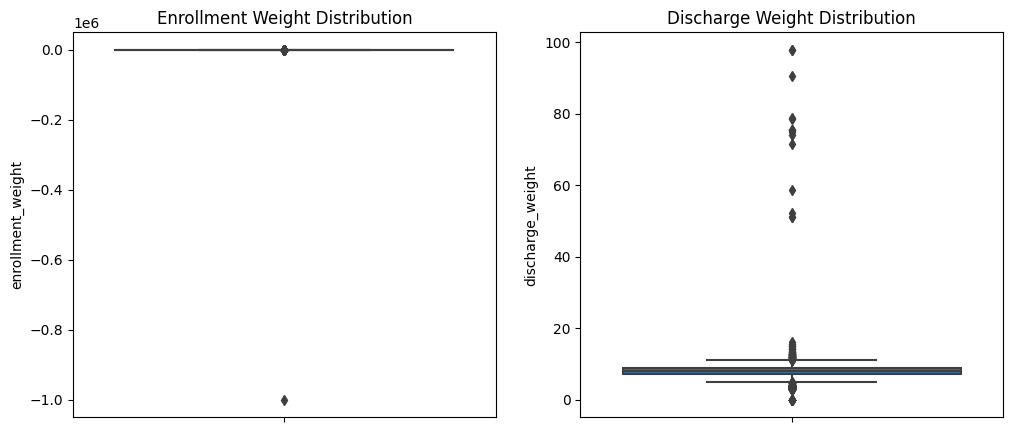

In [10]:
# Boxplot for Enrollment Weight and Discharge Weight
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=clinic_data["enrollment_weight"])
plt.title("Enrollment Weight Distribution")

plt.subplot(1, 2, 2)
sns.boxplot(y=clinic_data["discharge_weight"])
plt.title("Discharge Weight Distribution")

plt.show()


### Remove Outliers in Enrollment & Discharge Weight
We use Interquartile Range (IQR) to filter out extreme values:

In [11]:
# Define function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply function to weight columns
clinic_data = remove_outliers(clinic_data, 'enrollment_weight')
clinic_data = remove_outliers(clinic_data, 'discharge_weight')


### Data Analysis & Insights
#### A. Count Male & Female Patients by Clinic

In [12]:
# Count male and female patients at each clinic
clinic_gender_count = clinic_data.groupby(['site', 'sex'])['pid'].count().unstack()

# Fill NaN values with 0 (indicating no patients of that gender at that clinic)
clinic_gender_count.fillna(0, inplace=True)

# Display cleaned table
print(clinic_gender_count)


sex           female  male
site                      
bani_gaye        445   428
birin_fulani     716   733
dukku            716   655
galdamari        202   199
kwami            721   696


### B. Calculate Weight Gain Metrics
#### 1. Absolute Weight Gain per Clinic

In [13]:
clinic_data['weight_gain'] = clinic_data['discharge_weight'] - clinic_data['enrollment_weight']

# Average weight gain by clinic
clinic_weight_gain = clinic_data.groupby("site")["weight_gain"].mean()
print(clinic_weight_gain)


site
bani_gaye       1.603608
birin_fulani    1.923582
dukku           1.712152
galdamari       1.738105
kwami           1.935145
Name: weight_gain, dtype: float64


#### 2. Relative Weight Gain per Clinic (g/kg/day)

In [14]:
clinic_data['treatment_days'] = clinic_data['discharge_age'] - clinic_data['enrollment_age']

# Avoid division by zero
clinic_data = clinic_data[clinic_data['treatment_days'] > 0]

clinic_data['relative_weight_gain'] = (clinic_data['weight_gain'] / clinic_data['enrollment_weight']) / clinic_data['treatment_days'] * 1000

# Average relative weight gain by clinic
clinic_relative_gain = clinic_data.groupby("site")["relative_weight_gain"].mean()
print(clinic_relative_gain)

site
bani_gaye       181.352861
birin_fulani    215.526915
dukku           189.488624
galdamari       197.154202
kwami           257.812623
Name: relative_weight_gain, dtype: float64


### C. Identify Erroneous Discharges
Criteria:

Children older than 6 months should NOT be discharged if their weight is less than 4 kg

In [20]:
# Find erroneous discharges
erroneous_discharges = clinic_data[(clinic_data['discharge_age'] > 6) & (clinic_data['discharge_weight'] < 4)]

# Count per clinic
erroneous_discharges_count = erroneous_discharges.groupby("site")["pid"].count()
print(erroneous_discharges_count)


Series([], Name: pid, dtype: int64)


### Plan to Reduce Erroneous Discharges in 2025
There isn't erroneous discharge but in case there was, we then have to plan to Reduce Erroneous Discharges through:
Plan to Reduce Erroneous Discharges:
1. Conduct refresher training for clinic staff on discharge criteria.
2. Implement a double-check system for discharge decisions.
3. Introduce automated alerts in the clinic management system for patients who do not meet discharge criteria.
4. Regularly audit discharge records and provide feedback to staff.
5. Develop a standardized discharge checklistcheck

### D. Identify Discrepancies Between Clinic & Household Weight
A discrepancy is a weight difference >1.0 kg within 7 days.

In [17]:
# Merge clinic and household data on patient ID
merged_data = pd.merge(clinic_data, household_data, on='pid', how='inner')

# Calculate weight difference
merged_data['weight_difference'] = abs(merged_data['discharge_weight'] - merged_data['weight'])

# Filter for discrepancies
discrepancies = merged_data[(merged_data['weight_difference'] > 1.0) & (abs(merged_data['discharge_age'] - merged_data['todate']) <= 7)]

# Count discrepancies per clinic
discrepancies_by_clinic = discrepancies.groupby("site_x")["pid"].count()
print(discrepancies_by_clinic)


Series([], Name: pid, dtype: int64)


In [21]:
# Rank clinic staff by discrepancies
staff_discrepancies = discrepancies.groupby('staffmember').size().sort_values(ascending=False)
print("Staff Ranked by Discrepancies:\n", staff_discrepancies)


Staff Ranked by Discrepancies:
 Series([], dtype: int64)


### Plan to Address Discrepancies
Despite seeing no discrepancies from the above code, incase there was we would have plan to Address Weight Discrepancies through:
1. Investigate root causes of discrepancies (e.g., measurement errors, data entry errors).
2. Provide additional training on accurate weight measurement techniques.
3. Standardize data collection protocols across clinics.
4. Introduce regular calibration of weighing scales.
5. Conduct random spot checks during household visits.

In [18]:
clinic_data.to_csv("cleaned_clinic_data.csv", index=False)
household_data.to_csv("cleaned_household_data.csv", index=False)